In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

##### Load the dataset in pandas dataframe

In [2]:
df = pd.read_csv("Data.csv")
df.sample(5)

,area,bedrooms,price
3,1521,3,75
5,1170,2,38
2,1440,3,62
10,1800,3,82
4,1200,2,51


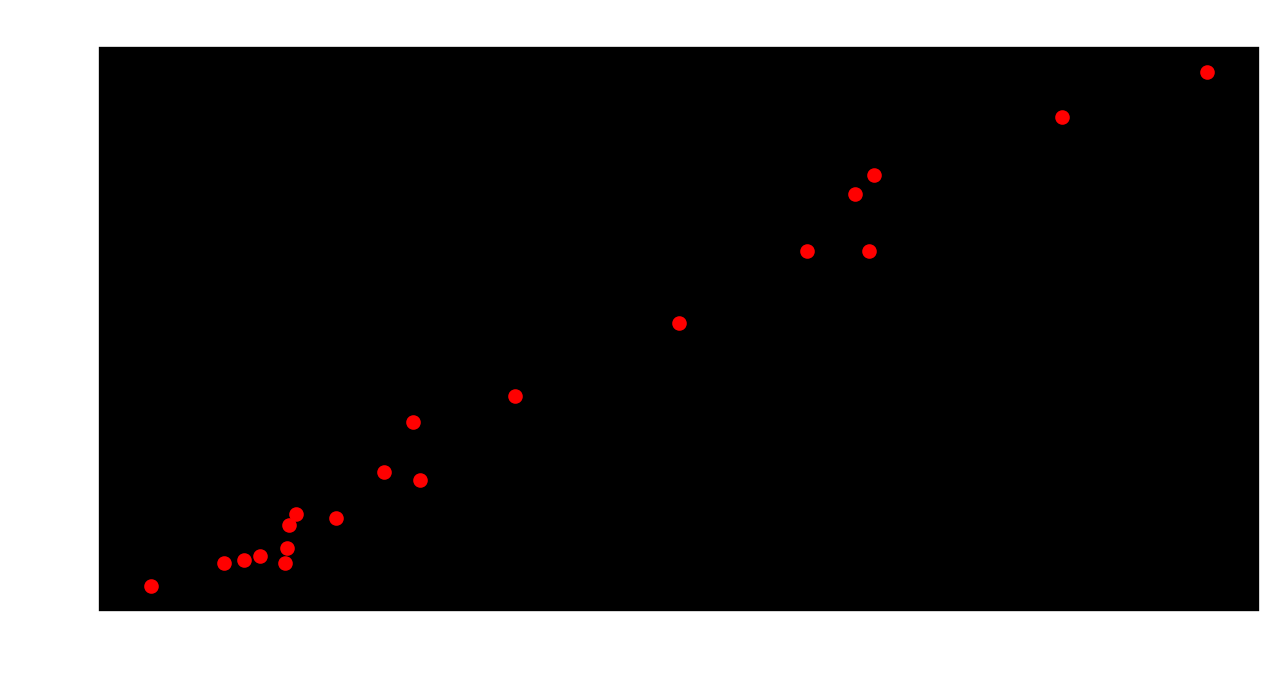

In [3]:
plt.figure(figsize=(10,5),dpi=150)
plt.style.use("dark_background")
area = df["area"]
price = df["price"]
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.scatter(area, price, c="red", marker="o")
plt.savefig("Images/area_vs_price.png", bbox_inches="tight")

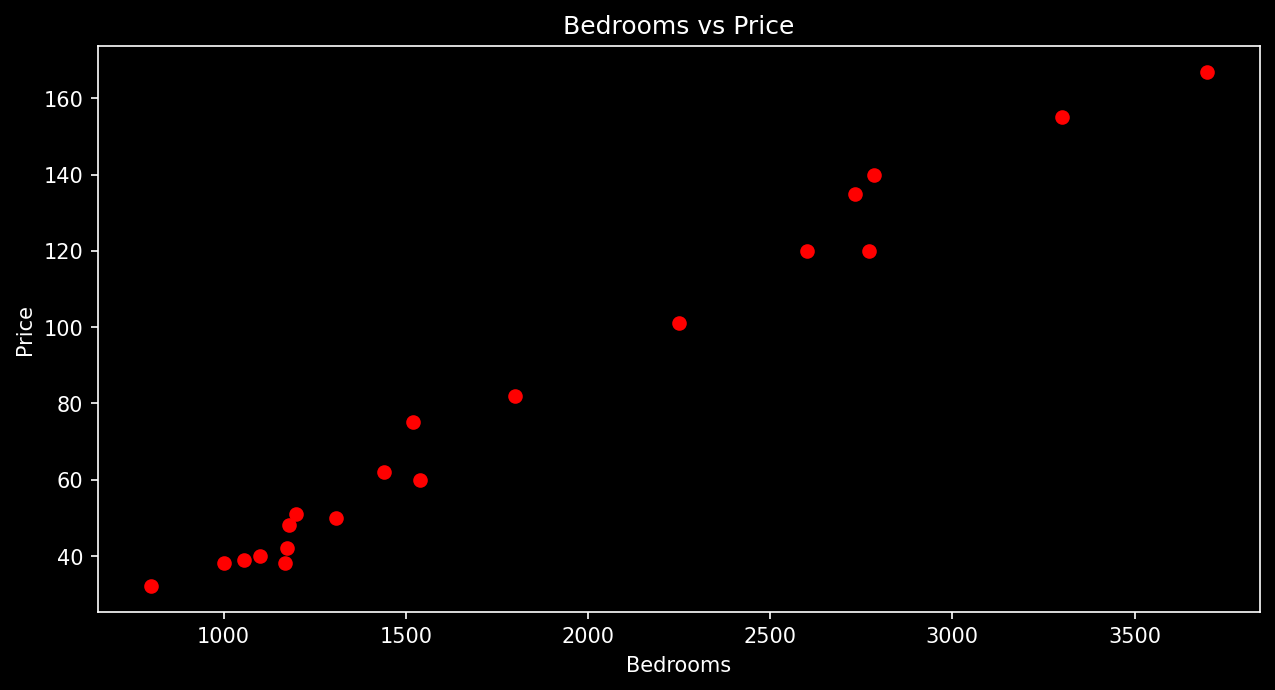

In [4]:
plt.figure(figsize=(10,5),dpi=150)
plt.style.use("dark_background")
bedrooms = df["bedrooms"]
price = df["price"]
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Price")
plt.scatter(area, price, c="red", marker="o")
plt.savefig("Images/bedrooms_vs_price.png", bbox_inches="tight")

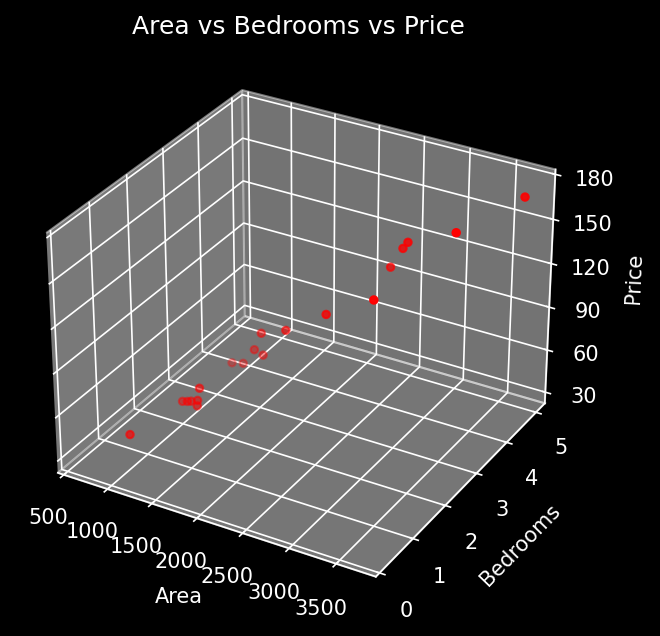

In [5]:
plt.figure(figsize=(10,5),dpi=150)
plt.style.use("dark_background")
ax = plt.axes(projection="3d")
ax.scatter3D(area, bedrooms, price, color="red", marker=".", s=50)
ax.set_xticks(np.arange(500, 4000, 500))
ax.set_yticks(np.arange(0, 6, 1))
ax.set_zticks(np.arange(30, 200, 30))
ax.set_xlabel("Area")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("Area vs Bedrooms vs Price")
plt.savefig("Images/area_vs_bedrooms_vs_price.png", bbox_inches="tight")

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
print(X.shape)
print(y.shape)

(20, 2)
(20,)


In [8]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

<h3 style='color:purple'>(1) Batch Gradient Descent Implementation</h3>

In [9]:
def mini_batch_gradient_descent(x, y_true, epochs = 1000, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = x.shape[1] # our case number_of_features = 2 (area, bedroom)
    w = np.ones(number_of_features) # initialize weights to 1
    b = 0 # initialize bias to 0
    total_samples = x.shape[0] # number of rows in x
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples

    cost_list = []
    epoch_list = []
        
    for epoch in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = w @ Xj.T + b
            error = yj - y_predicted
            w_grad = -(2/batch_size)*(error @ Xj)
            b_grad = -(2/batch_size)*np.sum(error)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.sum(error**2)/batch_size
        
        if epoch%50==0:
            cost_list.append(cost)
            epoch_list.append(epoch)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_X,y)
w, b, cost

(array([40.68041435,  2.53384575]), 79.75081514948614, 29.539209453699634)

###### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

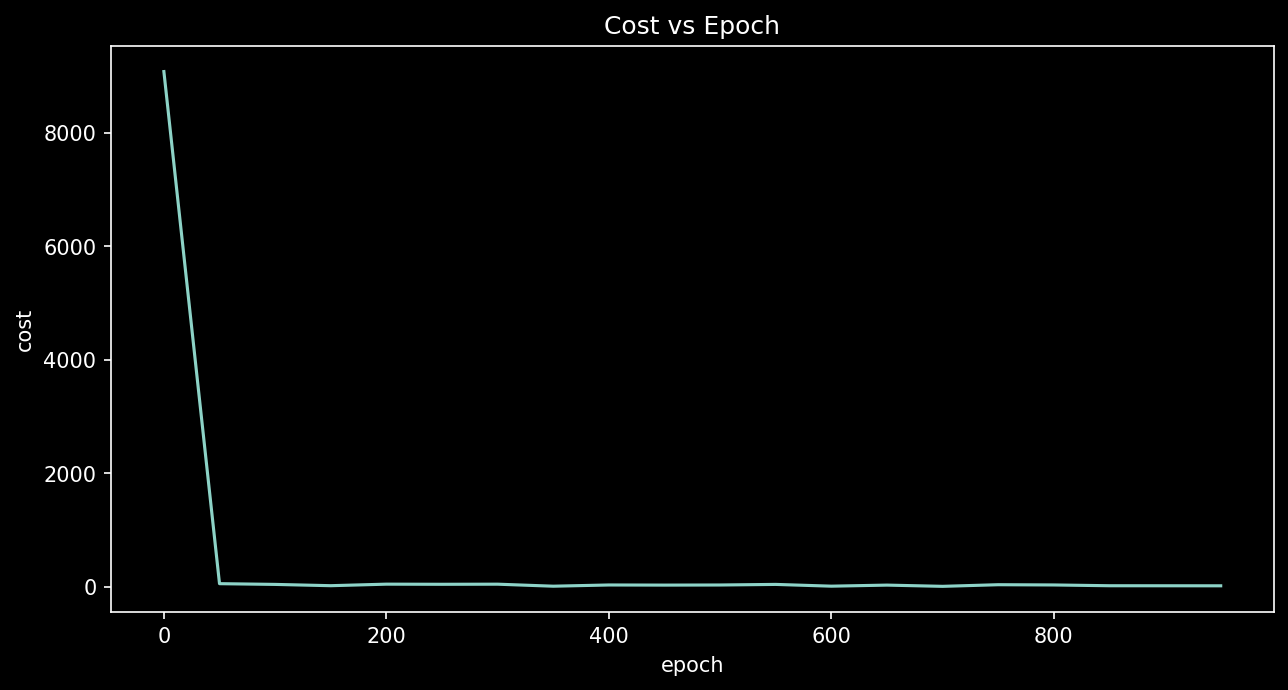

In [10]:
plt.figure(figsize=(10,5),dpi=150)
plt.style.use("dark_background")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Cost vs Epoch")
plt.plot(epoch_list,cost_list)
plt.savefig("Images/cost_vs_epoch_MBGD.png", bbox_inches="tight")

###### Lets do some predictions now. 

In [11]:
def predict(x):
    scaled_x = scaler.fit_transform(x)
    y_pred = w @ scaled_x.T + b
    return y_pred

In [12]:
predict(X)

array([ 40.38329416, 120.287881  ,  61.6058313 ,  65.51590929,
        47.33454391,  45.88636688, 126.65985994, 154.07867842,
        55.33039749, 176.07357664,  78.98395568, 129.21830603,
        37.68003037,  42.50728714, 100.70661117,  46.12772972,
        49.05496369,  66.43308807, 125.80834639,  25.33964569])